# Laboratorio 1 – Machine Learning  
## Predicción del Riesgo Cardiovascular – AlpesHearth  

### Integrantes:
1. Juan Sebastian Rodriguez Torres - 202214617 - js.rodriguezt1@uniandes.edu.co
2. Luis Felipe Sales Galviz - 202211531 - l.sales@uniandes.edu.co

En este archivo se desarrollan los modelo de regresión lineal solicitados para estimar el "CVD Risk Score" de una persona a partir de las variables clínicas dadas. Las enfermedades cardiovasculares representan una de las principales causas de mortalidad a nivel mundial. AlpesHearth busca identificar tempranamente factores de riesgo en población joven con el fin de diseñar prevenciones.


## 1. Carga de datos

En esta sección se cargan los conjuntos de datos de entrenamiento, para comprender el significado de cada variable.
Con esto verificamos la estructura del dataset, las dimensiones, los tipos de variables y los datos en general antes de que empecemos a explorar y corregir.

In [1691]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns



from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import (

    StandardScaler,

    MinMaxScaler,

    OneHotEncoder,

    OrdinalEncoder,

    FunctionTransformer,

)

from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from statsmodels.formula.api import ols



from statsmodels.stats.diagnostic import linear_rainbow

from scipy.stats import ttest_1samp

from statsmodels.stats.stattools import durbin_watson

import statsmodels.api as sm

from statsmodels.stats.diagnostic import het_breuschpagan

import scipy.stats as stats

from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import shapiro





"""

from importlib.metadata import version

print(f"Versión de Pandas: {version('pandas')}")

print(f"Versión de Matplotlib: {version('matplotlib')}")

print(f"Versión de Scikit-learn: {version('scikit-learn')}")

print(f"Versión de Seaborn: {version('seaborn')}") """



df_real = pd.read_csv("./data/Datos Lab 1.csv")

df = df_real

print("Columnas y primeros 8 datos del dataframe (para observar correcta carga):\n")

df.head(9)


Columnas y primeros 8 datos del dataframe (para observar correcta carga):



,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,"November 08, 2023",M,44.000,114.300,1.720,38.600,100.000,112/83,228.0,...,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,20/03/2024,F,57.000,92.923,1.842,33.116,106.315,101/91,158.0,...,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
2,WjVn1699,2021-05-27,F,NaN,73.400,1.650,27.000,78.100,90/74,135.0,...,High,N,165.000,0.473,90.0,74.0,Normal,45.0,12.600,LOW
3,dCDO1109,"April 18, 2022",F,35.000,113.300,1.780,35.800,79.600,92/89,158.0,...,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
4,pnpE1080,01/11/2024,F,48.000,102.200,1.750,33.400,106.700,121/68,207.0,...,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH
5,MQyB2747,25 Mar 24,M,43.000,52.700,1.850,15.400,107.700,107/61,105.0,...,High,N,185.000,0.582,107.0,61.0,Normal,43.0,10.530,INTERMEDIARY
6,DHdn8968,22 May 25,F,31.000,87.000,1.660,31.600,91.500,139/81,207.0,...,Low,Y,166.000,0.551,139.0,81.0,Hypertension Stage 1,121.0,17.410,HIGH
7,vkQL9700,"October 26, 2023",M,69.000,59.684,1.940,23.914,117.986,106/115,206.0,...,High,Y,193.981,0.608,106.0,115.0,Hypertension Stage 2,134.0,16.203,HIGH
8,bUBT9994,15/12/2023,F,89.162,85.600,1.660,31.100,83.600,103/99,222.0,...,High,N,166.000,0.504,103.0,99.0,Hypertension Stage 2,126.0,NaN,HIGH


## 2. Exploración y perfilamiento de datos

Aqui vamos a que permite identificar posibles problemas y transformaciones necesarias para poder seguir con el modelado.

- Ver el tamaño y los tipos de datos
- Analizar valores nulos
- Identificar registros duplicados
- Estadisticas numéricas
- Verificar correlaciones entre variables
- Identificar de valores atipicos


## Completitud de datos

In [1692]:
print("\n◉ PORCENTAJE DE VALORES NULOS:\n")
print((df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False))

print("\n\n◉ INFORMACION DEL DATAFRAME:\n")
df.info()


◉ PORCENTAJE DE VALORES NULOS:

Diastolic BP                    5.186089
HDL (mg/dL)                     5.003051
Waist-to-Height Ratio           4.636974
Weight (kg)                     4.453935
Total Cholesterol (mg/dL)       4.148871
Age                             4.148871
Height (cm)                     4.148871
Height (m)                      3.721782
Abdominal Circumference (cm)    3.721782
Systolic BP                     3.721782
Estimated LDL (mg/dL)           3.477730
Fasting Blood Sugar (mg/dL)     3.294692
BMI                             3.233679
CVD Risk Score                  1.769372
Sex                             0.000000
Patient ID                      0.000000
Date of Service                 0.000000
Family History of CVD           0.000000
Diabetes Status                 0.000000
Smoking Status                  0.000000
Blood Pressure (mmHg)           0.000000
Physical Activity Level         0.000000
Blood Pressure Category         0.000000
CVD Risk Level          

In [1693]:
print("\n\n◉ DESCRIPCIÓN ESTADÍSTICA (VARIABLES NUMÉRICAS):\n")
df.describe()



◉ DESCRIPCIÓN ESTADÍSTICA (VARIABLES NUMÉRICAS):



,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Estimated LDL (mg/dL),CVD Risk Score
count,1571.000000,1566.000000,1578.000000,1586.000000,1578.000000,1571.000000,1557.000000,1585.000000,1571.000000,1563.000000,1578.000000,1554.000000,1582.000000,1610.000000
mean,46.803186,85.666006,1.757439,28.424744,91.538861,199.043673,56.183558,117.836860,175.770082,0.522440,125.632637,82.887536,113.235896,18.227281
std,13.039479,21.712504,0.118012,7.309275,13.427985,59.388670,16.721702,32.379634,11.695880,0.085692,22.577463,15.503625,61.435291,10.767666
min,6.134000,13.261000,1.371000,4.317000,49.542000,-1.256000,0.008000,15.306000,136.498000,0.250000,49.914000,31.720000,-92.055000,-20.057000
25%,37.000000,67.100000,1.666500,22.600000,79.700000,150.000000,42.000000,92.000000,167.000000,0.453000,108.000000,71.000000,62.000000,15.150000
50%,46.000000,86.314000,1.760000,28.000000,91.200000,199.000000,56.000000,115.000000,176.000000,0.519000,125.000000,82.000000,112.000000,16.967000
75%,55.000000,104.801500,1.850000,33.963000,102.267250,250.000000,70.000000,139.000000,185.000000,0.582000,141.000000,93.000000,159.000000,18.900000
max,89.420000,158.523000,2.146000,53.028000,136.336000,385.679000,110.315000,219.667000,214.394000,0.804000,202.711000,134.066000,317.314000,114.980000




◉ HEATMAP PARA VER CORRELACIÓN ENTRE VARIABLES:



<Axes: >

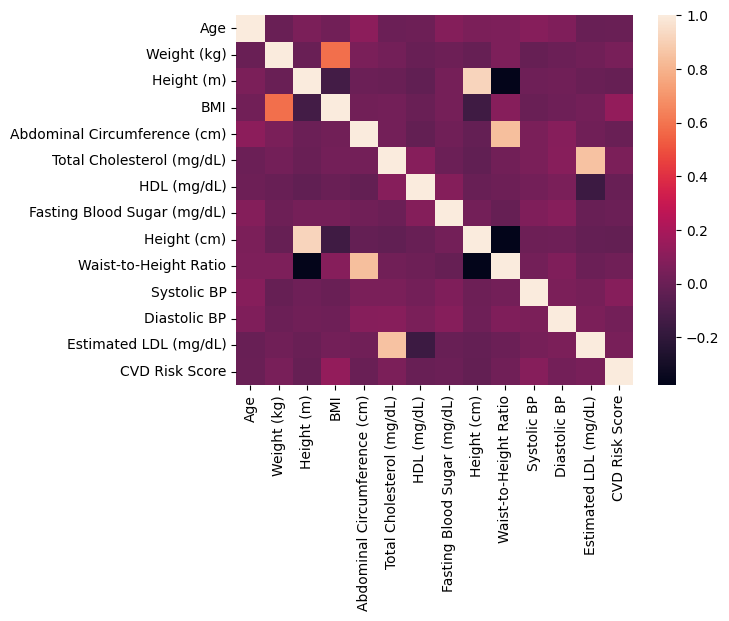

In [1694]:
print("\n\n◉ HEATMAP PARA VER CORRELACIÓN ENTRE VARIABLES:\n")
sns.heatmap(df.corr(numeric_only=True))

## Unicidad de datos

In [1695]:
print("\n\n◉ Podemos verificar si hay filas duplicadas en el dataset:\n")
df.duplicated(keep  = False).sum()
df[df.duplicated(keep = False)]



◉ Podemos verificar si hay filas duplicadas en el dataset:



,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
10,oSqq7069,18 Jun 23,F,38.0,68.516,1.929,39.967,96.957,105/84,241.000,...,Moderate,Y,192.936,0.503,105.0,84.0,Hypertension Stage 1,159.0,18.063,HIGH
14,gBFe4249,04/02/2020,F,52.0,89.700,1.880,25.400,107.500,145/92,142.000,...,Low,Y,188.000,0.572,145.0,92.0,Hypertension Stage 2,42.0,17.170,HIGH
17,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.900,139/61,253.000,...,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH
29,RlsB8509,29/08/2020,F,55.0,79.700,1.780,25.200,86.900,140/62,248.000,...,Moderate,Y,178.000,0.488,140.0,62.0,Hypertension Stage 2,182.0,19.000,HIGH
31,RwGu5647,"May 03, 2020",M,42.0,51.095,1.521,20.190,72.274,159/91,296.000,...,Moderate,N,152.080,0.259,159.0,91.0,Hypertension Stage 2,211.0,17.908,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,KiRC8867,20/12/2024,M,46.0,90.748,1.705,30.866,108.768,105/113,198.000,...,Moderate,N,170.518,0.638,105.0,113.0,Hypertension Stage 2,117.0,15.383,INTERMEDIARY
1614,XUjh9519,2022-08-15,F,55.0,73.500,1.880,20.800,82.700,144/72,21.662,...,Low,Y,188.000,0.440,144.0,72.0,Hypertension Stage 2,100.0,16.680,HIGH
1624,rZFB5714,05 Sep 21,M,NaN,55.600,1.830,16.600,104.800,126/95,289.000,...,High,N,183.000,0.573,126.0,95.0,Hypertension Stage 2,201.0,15.400,INTERMEDIARY
1633,gBFe4249,04/02/2020,F,52.0,89.700,1.880,25.400,107.500,145/92,142.000,...,Low,Y,188.000,0.572,145.0,92.0,Hypertension Stage 2,42.0,17.170,HIGH


In [1696]:
print("\n\n◉ Podemos verificar si hay más de un registro con el mismo ID de paciente\n")
dup_counts = (df[["Patient ID"]].groupby("Patient ID").size().reset_index(name="Count").sort_values(by="Count", ascending=False))
dup_counts = dup_counts[dup_counts["Count"] > 1]
for id_, n in dup_counts[["Patient ID", "Count"]].values:
    print(f"Id={id_} -> {n} registros")
size = dup_counts.shape[0]
print("En total hay ", size)



◉ Podemos verificar si hay más de un registro con el mismo ID de paciente

Id=HNpy8362 -> 3 registros
Id=zZle5455 -> 3 registros
Id=QJtE0701 -> 3 registros
Id=HNwp6592 -> 3 registros
Id=zhZi8857 -> 3 registros
Id=THSJ8564 -> 3 registros
Id=RlsB8509 -> 3 registros
Id=DxSq2036 -> 3 registros
Id=ZoSr4813 -> 3 registros
Id=KQUs0708 -> 3 registros
Id=HVVR3121 -> 3 registros
Id=aKVE8560 -> 3 registros
Id=cUUw7860 -> 3 registros
Id=RwGu5647 -> 3 registros
Id=KXhc1181 -> 3 registros
Id=dJuC5084 -> 3 registros
Id=dNyM1057 -> 3 registros
Id=dSiv4949 -> 3 registros
Id=Kbzi4901 -> 3 registros
Id=eAaf2477 -> 3 registros
Id=gBFe4249 -> 3 registros
Id=Xvbe7861 -> 3 registros
Id=Keaq9838 -> 3 registros
Id=ePpS4710 -> 3 registros
Id=TPHC2670 -> 3 registros
Id=fHqx3420 -> 3 registros
Id=gXxm9399 -> 3 registros
Id=gdBF9655 -> 3 registros
Id=BQvQ6431 -> 3 registros
Id=EsZI4603 -> 3 registros
Id=KiRC8867 -> 3 registros
Id=gynJ3543 -> 3 registros
Id=inTX4760 -> 3 registros
Id=ivTX4645 -> 3 registros
Id=sI

Podemos ver que existen muchos ids de pacientes que se repiten, lo que indica que hay registros duplicados. Esto puede ser un problema para el modelado, ya que puede sesgar los resultados y hacer que el modelo aprenda patrones incorrectos. Vamos a profundizar como puede cambiar cada registro

In [1697]:
dup_table = (
    df[df["Patient ID"].duplicated(keep=False)]
    .copy()
    .assign(repeticiones=df.groupby("Patient ID")["Patient ID"].transform("size"))
    .sort_values(["repeticiones", "Patient ID"], ascending=[False, True])
    
)
dup_table

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level,repeticiones
17,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.9,139/61,253.0,...,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH,3
1227,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.9,139/61,253.0,...,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,-13.090,HIGH,3
1584,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.9,139/61,253.0,...,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH,3
130,BQvQ6431,09/11/2020,M,33.0,118.300,1.690,41.400,72.1,116/93,171.0,...,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.0,17.500,LOW,3
1469,BQvQ6431,09/11/2020,M,33.0,118.300,1.690,41.400,72.1,116/93,171.0,...,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.0,29.833,LOW,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,yvsn3005,28 Oct 20,F,60.0,54.300,1.810,16.600,99.1,133/65,187.0,...,N,181.000,0.548,133.0,65.0,Hypertension Stage 1,79.0,15.710,INTERMEDIARY,2
95,zcgB3048,12/06/2020,M,38.0,60.436,1.506,20.269,79.7,168/63,119.0,...,N,150.616,0.529,168.0,63.0,Hypertension Stage 2,43.0,14.834,HIGH,2
375,zcgB3048,12/06/2020,M,38.0,60.436,1.506,20.269,79.7,168/63,119.0,...,N,150.616,0.529,168.0,63.0,Hypertension Stage 2,43.0,14.834,HIGH,2
799,zxhX5525,"November 13, 2021",M,26.0,58.953,1.688,25.286,NaN,110/114,258.0,...,Y,168.763,0.455,110.0,114.0,Hypertension Stage 2,170.0,15.717,HIGH,2


Podemos ver unos de los Ids de pacientes duplicados para ver que podemos hacer con estos datos.

In [1698]:
df[df["Patient ID"] == "AhYt1346"]

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
17,AhYt1346,09-28-2020,M,41.0,71.3,1.73,23.8,107.9,139/61,253.0,...,Low,Y,173.0,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.77,HIGH
1227,AhYt1346,09-28-2020,M,41.0,71.3,1.73,23.8,107.9,139/61,253.0,...,Low,Y,173.0,NaN,139.0,NaN,Hypertension Stage 1,146.0,-13.09,HIGH
1584,AhYt1346,09-28-2020,M,41.0,71.3,1.73,23.8,107.9,139/61,253.0,...,Low,Y,173.0,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.77,HIGH


Eliminamos los duplicados

## Validez de los datos

Observando algunos datos estadisticos del daatframe encontramos algunos datos que no son validos. Por ejemplo, el colesterol total tiene un min = - 1.256, pasaremos este valor a positivo con absoluto. Por otra parte, el LDL estimado tiene min= -92.055. Haremos lo mismo, pondremos el absoluto de estos valores.

In [1699]:
def limpiar_colesterol(df):
    df = df.copy()
    df["Total Cholesterol (mg/dL)"] = df["Total Cholesterol (mg/dL)"].abs()
    return df

def limpiar_ldl(df):
    df = df.copy()
    df["Estimated LDL (mg/dL)"] = df["Estimated LDL (mg/dL)"].abs()
    return df

limpieza_colesterol = FunctionTransformer(limpiar_colesterol)
limpieza_ldl = FunctionTransformer(limpiar_ldl)

De la misma manera, CVD Risk Score debe ser un porcentaje, por lo que pondremos en valor absoluto los negativos y aproximaremos los valores a 100 si son mayores.

In [1700]:

df["CVD Risk Score"] = df["CVD Risk Score"].abs()
df["CVD Risk Score"] = df["CVD Risk Score"].clip(upper=100)

Podemos separar ahora la columna Blood Pressure y reemplazar los datos donde estan esten vacias.

In [1701]:
# ...existing code...
def separar_presion(df):
    df = df.copy()
    # Si existe la columna de texto, extraemos los valores reales
    if "Blood Pressure (mmHg)" in df.columns:
        # Extraer números xxx/xxx
        bp = df["Blood Pressure (mmHg)"].str.extract(r'(\d+)/(\d+)')
        
        # Sobrescribir las columnas numéricas con los datos extraídos (que son los correctos)
        df["Systolic BP"] = bp[0].astype(float)
        df["Diastolic BP"] = bp[1].astype(float)
        
    return df

# Agrega esto al inicio de tu pipeline o función de limpieza
separacion_presion = FunctionTransformer(separar_presion)                  

## 3. Limpieza y preparación de datos

Con base en los hallazgos del análisis anterior vamos a modificar los datos para luego proceder al modelado.

Notamos que la columna "Height" está tecnicamente repetida, hay una para CM y otra para M. Al ser los mismos datos decidimos eliminar por completo una de las columnas, además no tienen una correlación fuerte con ninguna otra variable por lo que es seguro hacerlo.

Se encontraron 150 registros dulpicados exactamente iguales, si fueran pacientes distintos con los mismos datos el id sería diferente y no habria un duplicado, ademas si los registros son exactamente iguales podemos asumir que es un dato duplicado porque la fecha en la que se hizo al revisión seria la misma.

Decidimos tambien cambiar las variables con categorías "Y" para sí y "N" para no, por 1 para "Sí" y 0 para "No" con el fin de tener valores numéricos que apoyen la regresion lineal.

Tambien notamos que en la mayoría de variables hay entre un 1% y 5% de datos nulos, sin embargo al hacer la prueba de eliminar estos registros se elimina casi la mitad del dataframe por lo que no es óptimo.
Los únicos registros que decidimos eliminar son aquellos que tenian la variable objetivo nula porque imputar estos datos puede dar lugar a sesgos, además son solo 29 de los 1639 registros, lo que no es una reducción importante de datos y podemos prescindir de ellos.

Respecto al resto de valores nules decidimos hacer imputaciones para aproximar cada uno.

Vamos a crear un pipeline de limpieza de datos para poder aplicar las mismas transformaciones a los datos de entrenamiento y prueba, esto es importante para evitar sesgos y asegurar que el modelo se entrene con datos limpios y consistentes.

Luego, vamos a eliminar los duplicados **antes** del pipeline (sobre `df` completo), para no desalinear `X` y `y` en el problema supervisado.

## Partición de los datos


In [1702]:
# Eliminar duplicados ANTES del pipeline/split (para no romper alineación con y)
n_before = df.shape[0]
df = df.drop_duplicates(keep="first").copy()
n_after = df.shape[0]
print(f"Duplicados eliminados: {n_before - n_after} (quedan {n_after})")

Duplicados eliminados: 151 (quedan 1488)


In [1703]:
target = "CVD Risk Score"



# Drop filas con target nulo (antes de partir X/y)

n_before = df.shape[0]

df = df[df[target].notna()].copy()

n_after = df.shape[0]

print(f"Filas eliminadas por {target} NaN: {n_before - n_after} (quedan {n_after})")



X = df.drop(columns=[target])

y = df[target]


Filas eliminadas por CVD Risk Score NaN: 28 (quedan 1460)


Luego vamos a dividir el conjunto de datos en entrenamiento y prueba, con un valor semilla de 42 y un porcentaje de 25% para el conjunto de prueba

In [1704]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [1705]:
# Eliminamos columnas que no consideramos necesarias
cols_to_drop = ["Patient ID", "Date of Service", "Height (cm)", 
                "Blood Pressure (mmHg)", "CVD Risk Level"]
def drop_columns(df):
    return df.drop(columns=cols_to_drop, errors="ignore")

# validate=False para mantener DataFrame (nombres de columnas)
dropper = FunctionTransformer(drop_columns, validate=False)

Imputamos total cholesterol con estimated LDL, ya que tienen una correlación notoria.

In [1706]:
def imputar_total_cholesterol_con_ldl(df):
    y = "Total Cholesterol (mg/dL)"
    x = "Estimated LDL (mg/dL)"

    k = (df[y] / df[x]).dropna().median()
    df = df.fillna({y: k * df[x]})
    df[y] = df[y].round()
    return df

chol_imputer = FunctionTransformer(imputar_total_cholesterol_con_ldl, validate=False)


Imputamos waist-to-height ratio con abdominal circumference, ya que también tienen una correlación fuerte, para esto calculamos el valor de k a partir de los datos no nulos y luego lo aplicamos a los datos nulos para imputarlos.

In [1707]:
def imputar_waist_to_height_ratio_con_circ(df):
    ratio = "Waist-to-Height Ratio"
    circ = "Abdominal Circumference (cm)"
    k = (df[ratio] / df[circ]).dropna().median()
    df = df.fillna({ratio: k * df[circ]})
    df[ratio] = df[ratio].round()
    return df
waist_height_imputer = FunctionTransformer(imputar_waist_to_height_ratio_con_circ, validate=False)

# from sklearn.base import BaseEstimator, TransformerMixin

# class ProportionalImputer(BaseEstimator, TransformerMixin):
#     def __init__(self, source_col, target_col, agg="median", eps=1e-9):
#         self.source_col = source_col
#         self.target_col = target_col
#         self.agg = agg
#         self.eps = eps

#     def fit(self, X, y=None):
#         X = X.copy()
#         s = X[self.source_col]
#         t = X[self.target_col]

    #     mask = s.notna() & t.notna() & (s.abs() > self.eps)
    #     ratios = (t[mask] / s[mask]).replace([np.inf, -np.inf], np.nan).dropna()

    #     if ratios.empty:
    #         # fallback seguro si no hay datos para aprender k
    #         self.k_ = 1.0
    #     else:
    #         self.k_ = ratios.median() if self.agg == "median" else ratios.mean()

    #     return self

    # def transform(self, X):
    #     X = X.copy()
    #     s = X[self.source_col]
    #     t = X[self.target_col]

    #     fill_mask = t.isna() & s.notna()
    #     X.loc[fill_mask, self.target_col] = self.k_ * s[fill_mask]

    #     return X


Ahora vamos a clasificarlas variables numericas y categoricas, cada una va a tener su pipline según su clasificación

In [1708]:
numeric_features = [

    "Age", "Weight (kg)", "Height (m)", "BMI",

    "Abdominal Circumference (cm)", "Total Cholesterol (mg/dL)",

    "HDL (mg/dL)", "Fasting Blood Sugar (mg/dL)",

    "Waist-to-Height Ratio", "Systolic BP", "Diastolic BP",

    "Estimated LDL (mg/dL)",

    # Nota: la variable objetivo NO debe ir en X (se elimina antes del split)

    # "CVD Risk Score",

]



# Normalización (MinMax) para numéricas, EXCEPTO Waist-to-Height Ratio

numeric_scaled_features = numeric_features 



# Variables ordinales (tienen orden):

# - Physical Activity Level: Bajo < Moderado < Alto

# - Blood Pressure Category: Normal < Elevada < Hipertensión Etapa 1 < Hipertensión Etapa 2

ordinal_features = ["Physical Activity Level", "Blood Pressure Category"]



# Variables categóricas (nominales) para OneHot

categorical_features = [

    "Sex", "Smoking Status", "Diabetes Status",

    "Family History of CVD",

]


Ahora vamos hacer las transformaciones necesarias para el modelo de regresion lineal, en este caso vamos hacer el tratamiento de valores faltantes imputando los datos por la media.

In [1709]:
# Numéricas: imputación + MinMaxScaler (excepto Waist-to-Height Ratio)
numeric_scaled_transformer = Pipeline(

    steps=[

        ("imputer", SimpleImputer(strategy="median")),

        ("scaler", MinMaxScaler()),

    ]

)



# Numéricas sin normalizar: solo imputación

numeric_unscaled_transformer = Pipeline(

    steps=[

        ("imputer", SimpleImputer(strategy="median")),

    ]

)


Ahora vamos hacer la transformación de las variables categorcias, si hay boolean con one-hot encoding pasamos estos valores a binarias, y si hay variables categoricas con mas de dos categorias con one-hot encoding pasamos estas variables a binarias.

In [1710]:
categorical_transformer = Pipeline(steps=[

    ("imputer", SimpleImputer(strategy="most_frequent")),

    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="if_binary")),

])



# OrdinalEncoder: convierte variables ordinales a números ordenados

# - Physical Activity Level: Bajo/Moderado/Alto -> 0/1/2

# - Blood Pressure Category: Normal/Elevada/Etapa 1/Etapa 2 -> 0/1/2/3

ordinal_transformer = Pipeline(steps=[

    ("imputer", SimpleImputer(strategy="most_frequent")),

    (

        "ordinal",

        OrdinalEncoder(

            categories=[

                ["Low", "Moderate", "High"],

                ["Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2"],

            ],

            handle_unknown="use_encoded_value",

            unknown_value=np.nan,

        ),

    ),

    ("imputer_after", SimpleImputer(strategy="most_frequent")),

])


Ahora con ColumTransform vamos aplicar las transformaciones para cada tipo de variable, asi preprocesamos en un bloque las dos variables, numericas y categoricas.

In [1711]:
preprocessor = ColumnTransformer(

    transformers=[

        ("num_scaled", numeric_scaled_transformer, numeric_scaled_features),

        ("ord", ordinal_transformer, ordinal_features),

        ("cat", categorical_transformer, categorical_features),

    ]

)


Finalmente definimos todo el pipeline integrando las transformaciones anteriores.

In [1712]:
pipeline_regresion = Pipeline(steps=[
    ("separacion_presion", separacion_presion),
    ("limpiar_colesterol", limpieza_colesterol),
    ("limpiar_ldl", limpieza_ldl),
    ("imputacion_chol", chol_imputer),
    ("imputacion_wthr", waist_height_imputer),
    ("dropper", dropper),
    ("preprocessor", preprocessor),
])

Aqui podemos ver como quedo la estrcutra del pipeline:

In [1713]:
from sklearn import set_config
set_config(display="diagram")

In [1714]:
pipeline_regresion

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('separacion_presion', ...), ('limpiar_colesterol', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"func func: callable, default=NoneThe callable to use for the transformation. This will be passedthe same arguments as transform, with args and kwargs forwarded.If func is None, then func will be the identity function.",<function sep...001F8996F9D00>
,"inverse_func inverse_func: callable, default=NoneThe callable to use for the inverse transformation. This will bepassed the same arguments as inverse transform, with args andkwargs forwarded. If inverse_func is None, then inverse_funcwill be the identity function.",None
,"validate validate: bool, default=FalseIndicate that the input X array should be checked before calling``func``. The possibilities are:- If False, there is no input validation.- If True, then X will be converted to a 2-dimensional NumPy array or sparse matrix. If the conversion is not possible an exception is raised... versionchanged:: 0.22 The default of ``validate`` changed from True to False.",False
,"accept_sparse accept_sparse: bool, default=FalseIndicate that func accepts a sparse matrix as input. If validate isFalse, this has no effect. Otherwise, if accept_sparse is false,sparse matrix inputs will cause an exception to be raised.",False
,"check_inverse check_inverse: bool, default=TrueWhether to check that or ``func`` followed by ``inverse_func`` leads tothe original inputs. It can be used for a sanity check, raising awarning when the condition is not fulfilled... versionadded:: 0.20",True
,"feature_names_out feature_names_out: callable, 'one-to-one' or None, default=NoneDetermines the list of feature names that will be returned by the`get_feature_names_out` method. If it is 'one-to-one', then the outputfeature names will be equal to the input feature names. If it is acallable, then it must take two positional arguments: this`FunctionTransformer` (`self`) and an array-like of input feature names(`input_features`). It must return an array-like of output featurenames. The `get_feature_names_out` method is only defined if`feature_names_out` is not None.See ``get_feature_names_out`` for more details... versionadded:: 1.1",None
,"kw_args kw_args: dict, default=NoneDictionary of additional ke

Ahora ajustamos el pipeline a X_train para transformar este conjunto de datos, para ello se crea otra variable para no afectar el dataframe original

In [1715]:
Xt_train = pipeline_regresion.fit_transform(X_train)

Finalmente transformamos los numpy array generados en la transformación one-hot a un dataframe

In [1716]:
feature_names = pipeline_regresion.named_steps["preprocessor"].get_feature_names_out()
Xt_train_df = pd.DataFrame(
    Xt_train.toarray() if hasattr(Xt_train, "toarray") else Xt_train,
    columns=feature_names,
    index=X_train.index
)

Xt_train_df.describe()



,num_scaled__Age,num_scaled__Weight (kg),num_scaled__Height (m),num_scaled__BMI,num_scaled__Abdominal Circumference (cm),num_scaled__Total Cholesterol (mg/dL),num_scaled__HDL (mg/dL),num_scaled__Fasting Blood Sugar (mg/dL),num_scaled__Waist-to-Height Ratio,num_scaled__Systolic BP,num_scaled__Diastolic BP,num_scaled__Estimated LDL (mg/dL),ord__Physical Activity Level,ord__Blood Pressure Category,cat__Sex_M,cat__Smoking Status_Y,cat__Diabetes Status_Y,cat__Family History of CVD_Y
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,0.489828,0.500226,0.500818,0.487125,0.490003,0.527425,0.506505,0.497514,0.585388,0.405161,0.394644,0.362377,1.021918,1.995434,0.505936,0.517808,0.502283,0.499543
std,0.152416,0.146500,0.149746,0.151499,0.147509,0.164386,0.147718,0.153872,0.492880,0.243986,0.250305,0.187088,0.814333,1.106313,0.500193,0.499911,0.500223,0.500228
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370603,0.377174,0.385806,0.366253,0.369430,0.400000,0.389749,0.376266,0.000000,0.202247,0.186441,0.208653,0.000000,1.500000,0.000000,0.000000,0.000000,0.000000
50%,0.478664,0.501432,0.501935,0.477782,0.486972,0.528000,0.507602,0.489106,1.000000,0.393258,0.372881,0.354079,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
75%,0.586725,0.626379,0.618065,0.598111,0.605667,0.664000,0.625454,0.597040,1.000000,0.573034,0.576271,0.501084,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## 4. Construcción de modelos de regresión lineal

Ahora construiremos los modelos de regresión lineal solicitados.

### 4.1 Modelo 1

# Entrenamiento del modelo de regresión lineal

Ahora entrenamos nuestro modelo de regresión creado con el objeto de la clase LinearRegression con los datos de entrenamiento

In [1717]:
Modelo = LinearRegression()

In [1718]:
Modelo.fit(Xt_train_df, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Podemos ahora generar las predicciones sobre el conjunto de entrenamiento.

In [1719]:
y_train_pred = Modelo.predict(Xt_train_df)

### 4.2 Modelo 2

## 5. Evaluación cuantitativa - Comparación de modelos

Se comparan los dos mejores modelos utilizando:
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)
- R² (Coeficiente de determinación)


Ahora vamos a validar el modelo evaluando su desempeño. Para ello calculamos el MAE, que mide el error promedio de las predicciones

In [1720]:
mae_train = mean_absolute_error(y_train, y_train_pred)
print("MAE train: ", mae_train)

MAE train:  3.2178595479217678


Luego calculamos el RMSE que refleja el error promedio de las prediciones en unidades de la variable objetivo

In [1721]:
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
print("RMSE train:", rmse_train)

RMSE train: 9.69355623201365


Finalmente, calculamos el R^2 que calcula que tan bien se ajustan las predicciones a los datos reales, con un valor de 1 indicando un ajuste perfecto y un valor de 0 indicando que el modelo no explica ninguna variabilidad en los datos.

In [1722]:
r2_train = r2_score(y_train, y_train_pred)
print("R²   train:", r2_train)



R²   train: 0.060322001072098064


In [63]:
# --- Resumen de X_train y y_train (describe) ---

print("\n◉ DESCRIBE X_train:\n")

display(X_train.describe(include="all").T)



print("\n◉ DESCRIBE y_train:\n")

display(y_train.describe())



# --- Nulos en X_train y y_train ---

nulos_x_por_col = X_train.isna().sum().sort_values(ascending=False)

print("\n◉ NULOS POR COLUMNA en X_train (desc):\n")

print(nulos_x_por_col)

print("\nTotal de valores nulos en X_train:", int(X_train.isna().sum().sum()))

print("Filas en X_train con al menos 1 nulo:", int(X_train.isna().any(axis=1).sum()))



nulos_y = int(y_train.isna().sum())

print("\nNulos en y_train:", nulos_y)



# --- Duplicados (exactos) ---

# Duplicados exactos por fila en X_train

dup_x_rows = int(X_train.duplicated(keep=False).sum())

print("\n◉ FILAS DUPLICADAS EXACTAS en X_train (keep=False):", dup_x_rows)

if dup_x_rows > 0:

    display(X_train[X_train.duplicated(keep=False)].head(20))



# Duplicados exactos de (X_train + y_train) para ver si se repite el mismo ejemplo con el mismo target

xy_train = X_train.copy()

xy_train["__y_train__"] = y_train

dup_xy_rows = int(xy_train.duplicated(keep=False).sum())

print("\n◉ FILAS DUPLICADAS EXACTAS en (X_train + y_train) (keep=False):", dup_xy_rows)

if dup_xy_rows > 0:

    display(xy_train[xy_train.duplicated(keep=False)].head(20))



◉ DESCRIBE X_train:



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Patient ID,1207,1046,tlWh1188,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of Service,1207,985,09-20-2023,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,1207,2,F,605,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1155.0,NaN,NaN,NaN,47.228294,13.127679,6.42,37.0,46.0,56.0,89.42
Weight (kg),1154.0,NaN,NaN,NaN,86.225106,21.590092,13.261,68.025,87.522,104.9505,158.523
Height (m),1162.0,NaN,NaN,NaN,1.761426,0.117244,1.41,1.67,1.76,1.85,2.146
BMI,1170.0,NaN,NaN,NaN,28.610186,7.212262,5.184,23.0,28.3,33.996,53.028
Abdominal Circumference (cm),1164.0,NaN,NaN,NaN,91.793418,13.353797,49.542,80.1,91.4285,102.5,136.336
Blood Pressure (mmHg),1207,920,121/68,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Cholesterol (mg/dL),1153.0,NaN,NaN,NaN,198.898555,59.181133,1.256,150.0,200.0,249.0,385.679



◉ DESCRIBE y_train:



count    1207.000000
mean       18.326102
std         9.900953
min         2.319000
25%        15.250000
50%        17.080000
75%        18.963500
max       100.000000
Name: CVD Risk Score, dtype: float64


◉ NULOS POR COLUMNA en X_train (desc):

Diastolic BP                    63
Waist-to-Height Ratio           60
Height (cm)                     57
HDL (mg/dL)                     54
Total Cholesterol (mg/dL)       54
Weight (kg)                     53
Age                             52
Height (m)                      45
Estimated LDL (mg/dL)           44
Abdominal Circumference (cm)    43
Systolic BP                     42
Fasting Blood Sugar (mg/dL)     39
BMI                             37
Sex                              0
Patient ID                       0
Date of Service                  0
Diabetes Status                  0
Smoking Status                   0
Blood Pressure (mmHg)            0
Physical Activity Level          0
Family History of CVD            0
Blood Pressure Category          0
CVD Risk Level                   0
dtype: int64

Total de valores nulos en X_train: 643
Filas en X_train con al menos 1 nulo: 496

Nulos en y_train: 0

◉ FILAS DUPLICADAS EXACTAS en X_train

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Diabetes Status,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Level
258,CeLz4743,31/03/2022,M,34.0,54.000,1.610,NaN,96.700,116/72,253.0,...,N,High,Y,161.000,0.601,116.0,72.0,Normal,186.0,INTERMEDIARY
1185,tlWh1188,2023-02-23,M,76.0,56.930,1.950,25.270,88.361,110/67,NaN,...,Y,Low,Y,195.013,0.453,110.0,67.0,Normal,113.0,INTERMEDIARY
1161,bCoz6266,11-12-2024,F,49.0,100.234,1.520,30.732,115.409,97/96,127.0,...,N,Moderate,Y,151.965,0.759,97.0,96.0,Hypertension Stage 2,36.0,HIGH
977,xFVW5778,"June 09, 2021",M,31.0,NaN,1.580,20.566,86.876,142/74,213.0,...,N,High,N,158.025,0.550,142.0,74.0,Hypertension Stage 2,107.0,HIGH
1004,NvOx6625,17/12/2021,M,45.0,96.800,1.860,28.000,71.400,112/75,230.0,...,Y,High,N,NaN,0.384,112.0,75.0,Normal,143.0,HIGH
1229,Uinq3357,11-26-2021,F,32.0,90.200,1.850,26.400,71.800,134/91,231.0,...,Y,Moderate,N,185.000,0.388,134.0,91.0,Hypertension Stage 1,148.0,INTERMEDIARY
501,PHii0023,02-23-2020,F,26.0,97.702,1.801,32.790,108.242,108/117,NaN,...,N,High,Y,180.122,0.601,108.0,117.0,Hypertension Stage 2,153.0,HIGH
269,ZEEd3660,07 Dec 20,M,38.0,63.600,1.810,19.400,49.542,95/66,169.0,...,N,High,Y,181.000,0.507,95.0,66.0,Normal,70.0,INTERMEDIARY
291,UQyn8657,30 Aug 24,F,37.0,15.036,1.870,25.900,87.600,113/75,252.0,...,Y,High,Y,187.000,0.468,113.0,75.0,Normal,143.0,HIGH
363,NMqH5860,"July 06, 2025",M,31.0,60.392,1.589,35.881,106.985,155/81,154.0,...,Y,High,N,NaN,0.673,155.0,81.0,Hypertension Stage 1,37.0,INTERMEDIARY



◉ FILAS DUPLICADAS EXACTAS en (X_train + y_train) (keep=False): 170


,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Level,__y_train__
258,CeLz4743,31/03/2022,M,34.0,54.000,1.610,NaN,96.700,116/72,253.0,...,High,Y,161.000,0.601,116.0,72.0,Normal,186.0,INTERMEDIARY,15.020
1185,tlWh1188,2023-02-23,M,76.0,56.930,1.950,25.270,88.361,110/67,NaN,...,Low,Y,195.013,0.453,110.0,67.0,Normal,113.0,INTERMEDIARY,16.294
1161,bCoz6266,11-12-2024,F,49.0,100.234,1.520,30.732,115.409,97/96,127.0,...,Moderate,Y,151.965,0.759,97.0,96.0,Hypertension Stage 2,36.0,HIGH,13.536
1229,Uinq3357,11-26-2021,F,32.0,90.200,1.850,26.400,71.800,134/91,231.0,...,Moderate,N,185.000,0.388,134.0,91.0,Hypertension Stage 1,148.0,INTERMEDIARY,18.600
501,PHii0023,02-23-2020,F,26.0,97.702,1.801,32.790,108.242,108/117,NaN,...,High,Y,180.122,0.601,108.0,117.0,Hypertension Stage 2,153.0,HIGH,17.198
291,UQyn8657,30 Aug 24,F,37.0,15.036,1.870,25.900,87.600,113/75,252.0,...,High,Y,187.000,0.468,113.0,75.0,Normal,143.0,HIGH,17.870
363,NMqH5860,"July 06, 2025",M,31.0,60.392,1.589,35.881,106.985,155/81,154.0,...,High,N,NaN,0.673,155.0,81.0,Hypertension Stage 1,37.0,INTERMEDIARY,20.006
56,xbYu9929,20/11/2024,M,46.0,72.000,1.750,23.500,89.100,100/90,198.0,...,Low,N,175.000,0.509,100.0,90.0,Hypertension Stage 2,92.0,INTERMEDIARY,13.660
932,LiFG5942,05/09/2025,M,51.0,75.800,1.900,21.000,96.800,142/66,280.0,...,Low,Y,190.000,0.509,142.0,66.0,Hypertension Stage 2,198.0,HIGH,18.900
617,ZEFR1505,10-27-2022,F,28.0,88.954,1.877,32.025,74.764,139/98,268.0,...,High,Y,187.748,NaN,139.0,NaN,Hypertension Stage 1,184.0,HIGH,18.715


## Estimación de la capacidad de generalización del modelo

Ahora evaluamos el modelo con el conjunto de prueba, lo que permite ver si el modelo es capaz de genralizar o si solo está haciendo memoria. Utilizamos pipeline_regresion.transform() para aplicar las transformaciones que se hicieron en la fase de entrenamiento. 

In [ ]:
Xt_test = pipeline_regresion.transform(X_test)

In [ ]:
feature_names = pipeline_regresion.named_steps["preprocessor"].get_feature_names_out()
Xt_test_df = pd.DataFrame(
    Xt_test.toarray() if hasattr(Xt_test, "toarray") else Xt_test,
    columns=feature_names,
    index=X_test.index
)

Ahora predecimos sobre el conjunto de prueba

In [ ]:
y_test_pred = Modelo.predict(Xt_test_df)

Validamos como se comporta nuestro modelo con estos nuevos datos.

In [63]:
mae_test = mean_absolute_error(y_test, y_test_pred)
print("MAE  test :", mae_test)

NameError: name 'y_test_pred' is not defined

In [ ]:
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
print("RMSE test :", rmse_test)

In [ ]:
r2_test = r2_score(y_test, y_test_pred)
print("R²   test :", r2_test)

## 6. Evaluación cualitativa - Variables más importantes

Con base en el mejor modelo determinar las variables más importantes para la predicción.Recuerde validar los supuestos de la regresión lineal para esta etapa de interpretación de resultados.

In [ ]:
pipeline_regresion = Pipeline(steps=[
    ("dropper", dropper),
    # Nota: NO quitamos duplicados dentro del pipeline porque elimina filas y desalinearía X/y.
    # Si quieres quitar duplicados, hazlo antes del train_test_split sobre el dataframe completo.
    # ("dup_dropper", dup_dropper),
    ("imputar colesterol", chol_imputer),
    ("imputar waist-to-height ratio", waist_height_imputer),
    ("preprocessor", preprocessor),
])

# (Tu mismo código, pero corregido)

target = "CVD Risk Score"
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

pipeline_regresion = Pipeline(steps=[
    ("dropper", dropper),
    # OJO: no uses drop_duplicates dentro del pipeline (rompe la alineación de filas con y)
    # ("dup_dropper", dup_dropper),
    ("imputar colesterol", chol_imputer),
    ("imputar waist-to-height ratio", waist_height_imputer),
    ("preprocessor", preprocessor),
])

# Smoke test del pipeline (solo preprocesamiento)
import numpy as np
import pandas as pd

print("X_train shape:", X_train.shape)

# OJO: hay que hacer fit en train antes de transformar test
Xt_train = pipeline_regresion.fit_transform(X_train)   # (y_train NO es necesario aquí)
print("Tipo Xt_train:", type(Xt_train))

# Pasar a DataFrame con nombres de features (si el preprocessor los soporta)
feature_names = pipeline_regresion.named_steps["preprocessor"].get_feature_names_out()
Xt_train_df = pd.DataFrame(
    Xt_train.toarray() if hasattr(Xt_train, "toarray") else Xt_train,
    columns=feature_names,
    index=X_train.index
)

print("Xt_train_df shape:", Xt_train_df.shape)
print("¿Mismas filas que X_train?:", Xt_train_df.shape[0] == X_train.shape[0])

# Chequeos de calidad: NaN/inf (sin np.isnan sobre objetos)
print("¿Hay NaN en X_train?:", X_train.isna().any().any())
print("¿Hay NaN en Xt_train_df?:", Xt_train_df.isna().any().any())

num_train = Xt_train_df.select_dtypes(include=[np.number])
print("¿Hay inf en Xt_train_df (numéricas)?:", np.isinf(num_train.to_numpy()).any())

# Vista rápida
display(Xt_train_df.head())
display(Xt_train_df.describe(include="all").T.head(10))

# Verifica que el pipeline también transforma X_test con las mismas columnas
Xt_test = pipeline_regresion.transform(X_test)
Xt_test_df = pd.DataFrame(
    Xt_test.toarray() if hasattr(Xt_test, "toarray") else Xt_test,
    columns=feature_names,
    index=X_test.index
)

print("X_test shape:", X_test.shape)
print("Xt_test_df shape:", Xt_test_df.shape)
print("¿Columnas iguales train vs test?:", list(Xt_test_df.columns) == list(Xt_train_df.columns))
print("¿Hay NaN en Xt_test_df?:", Xt_test_df.isna().any().any())

num_test = Xt_test_df.select_dtypes(include=[np.number])
print("¿Hay inf en Xt_test_df (numéricas)?:", np.isinf(num_test.to_numpy()).any())

display(Xt_test_df.head())